<a href="https://colab.research.google.com/github/markok20/Investointilaskelma/blob/main/teht%C3%A4v%C3%A4_2_heuristinen_p%C3%A4%C3%A4t%C3%B6ksenteko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kokonaiskustannukset: 10,973,000.00 euroa
    Tehdas Varasto  Määrä (kpl)
0        1       A          0.0
1        1       B          0.0
2        1       C          0.0
3        1       D          0.0
4        1       E      32000.0
5        2       A          0.0
6        2       B          0.0
7        2       C          0.0
8        2       D      67000.0
9        2       E      19000.0
10       3       A      27000.0
11       3       B          0.0
12       3       C      38000.0
13       3       D       5000.0
14       3       E          0.0
15       4       A          0.0
16       4       B          0.0
17       4       C          0.0
18       4       D          0.0
19       4       E          0.0
20       5       A          0.0
21       5       B          0.0
22       5       C          0.0
23       5       D          0.0
24       5       E          0.0
25       6       A          0.0
26       6       B      43000.0
27       6       C          0.0
28       6       D          0.

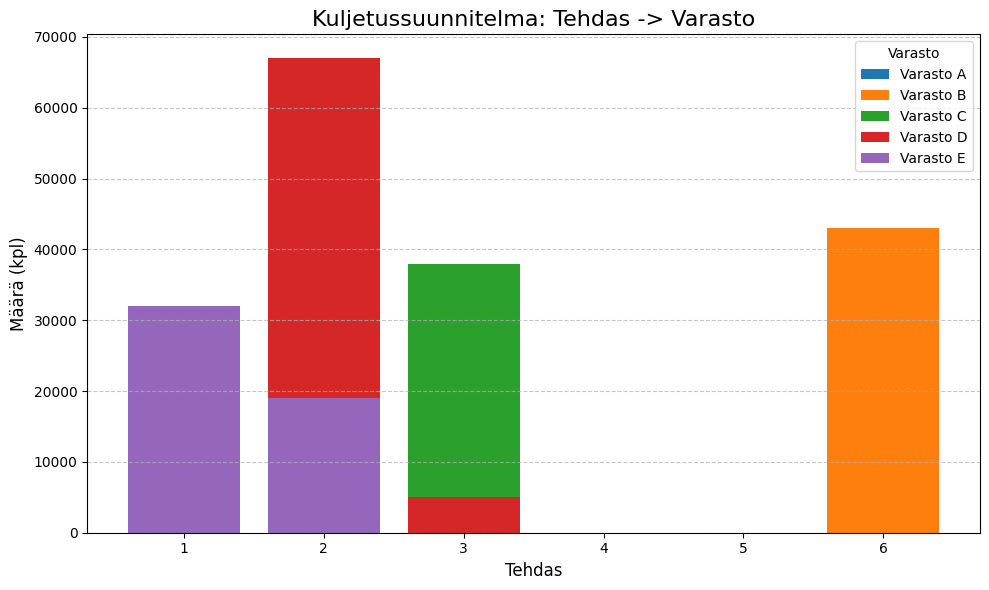

In [2]:
!pip install pulp

from pulp import LpProblem, LpMinimize, LpVariable, lpSum
import pandas as pd
import matplotlib.pyplot as plt

# Lähtötiedot
tehtaat = [1, 2, 3, 4, 5, 6]
varastot = ['A', 'B', 'C', 'D', 'E']

tarjonta = {1: 32000, 2: 86000, 3: 75000, 4: 100000, 5: 80000, 6: 62000}
kysynta = {'A': 27000, 'B': 43000, 'C': 38000, 'D': 72000, 'E': 51000}

kuljetuskustannukset = {
    (1, 'A'): 56, (1, 'B'): 47, (1, 'C'): 58, (1, 'D'): 50, (1, 'E'): 49,
    (2, 'A'): 49, (2, 'B'): 61, (2, 'C'): 55, (2, 'D'): 46, (2, 'E'): 50,
    (3, 'A'): 48, (3, 'B'): 59, (3, 'C'): 44, (3, 'D'): 51, (3, 'E'): 62,
    (4, 'A'): 58, (4, 'B'): 57, (4, 'C'): 52, (4, 'D'): 59, (4, 'E'): 56,
    (5, 'A'): 60, (5, 'B'): 62, (5, 'C'): 54, (5, 'D'): 53, (5, 'E'): 64,
    (6, 'A'): 49, (6, 'B'): 50, (6, 'C'): 60, (6, 'D'): 63, (6, 'E'): 66,
}

# Malli
malli = LpProblem("Kuljetuskustannusten_Optimointi", LpMinimize)

# määrät, jotka kuljetetaan tehtaalta varastolle
x = LpVariable.dicts("x", [(t, v) for t in tehtaat for v in varastot], lowBound=0, cat='Continuous')

# Minimoi kokonaiskuljetuskustannukset
malli += lpSum(kuljetuskustannukset[(t, v)] * x[(t, v)] for t in tehtaat for v in varastot)

# Rajoitukset
for t in tehtaat:
    malli += lpSum(x[(t, v)] for v in varastot) <= tarjonta[t], f"Tehdas_{t}_tarjonta"
for v in varastot:
    malli += lpSum(x[(t, v)] for t in tehtaat) == kysynta[v], f"Varasto_{v}_kysynta"

# Mallin ratkaisu
malli.solve()

# Tulosyhtälö ja print komento
kokonaiskustannukset = lpSum(kuljetuskustannukset[(t, v)] * x[(t, v)].varValue for t in tehtaat for v in varastot).value()
print(f"Kokonaiskustannukset: {kokonaiskustannukset:,.2f} euroa")

# kuljetussuunnitelman tallentaminen df
tulokset = []
for t in tehtaat:
    for v in varastot:
        tulokset.append([t, v, x[(t, v)].varValue or 0])  # VarValue voi olla None, jos ratkaisu on nolla

df = pd.DataFrame(tulokset, columns=["Tehdas", "Varasto", "Määrä (kpl)"])
print(df)

# exceliin
df.to_excel("kuljetussuunnitelma.xlsx", index=False)

# Visualisointi pylväinä
fig, ax = plt.subplots(figsize=(10, 6))

# Ryhmittely
for varasto in varastot:
    data = df[df["Varasto"] == varasto]
    ax.bar(data["Tehdas"], data["Määrä (kpl)"], label=f"Varasto {varasto}")

ax.set_title("Kuljetussuunnitelma: Tehdas -> Varasto", fontsize=16)
ax.set_xlabel("Tehdas", fontsize=12)
ax.set_ylabel("Määrä (kpl)", fontsize=12)
ax.legend(title="Varasto")
plt.xticks(tehtaat)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
